In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

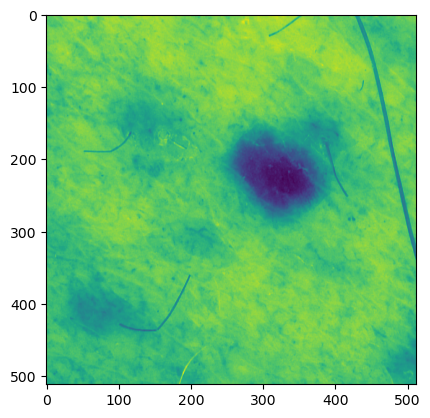

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

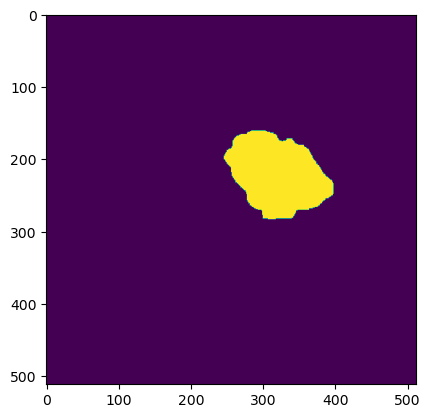

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpim3uahrdkuc_unet2d


In [11]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpim3uahrdkuc_unet2d
Verbose mode active!


In [12]:
R.classifier = C ### use custom classifier

In [13]:
R.run(images, masks, runs=10, batch_size=16)

Weights OK!
******
Loop 1
Epoch 1/100
39/39 [==============================] - 37s 688ms/step - loss: 0.5406 - dice_coeff: 0.3039 - val_loss: 0.5368 - val_dice_coeff: 0.3061
Epoch 2/100
39/39 [==============================] - 19s 483ms/step - loss: 0.4969 - dice_coeff: 0.3461 - val_loss: 0.4760 - val_dice_coeff: 0.4056
Epoch 3/100
39/39 [==============================] - 19s 483ms/step - loss: 0.4393 - dice_coeff: 0.4544 - val_loss: 0.4659 - val_dice_coeff: 0.5069
Epoch 4/100
39/39 [==============================] - 19s 482ms/step - loss: 0.4247 - dice_coeff: 0.5173 - val_loss: 0.4147 - val_dice_coeff: 0.5144
Epoch 5/100
39/39 [==============================] - 19s 482ms/step - loss: 0.4083 - dice_coeff: 0.5219 - val_loss: 0.4121 - val_dice_coeff: 0.5614
Epoch 6/100
39/39 [==============================] - 19s 484ms/step - loss: 0.4375 - dice_coeff: 0.5147 - val_loss: 0.4252 - val_dice_coeff: 0.5062
Epoch 7/100
39/39 [==============================] - 19s 496ms/step - loss: 0.4256 - d

Epoch 1/100
85/85 [==============================] - 32s 375ms/step - loss: 0.4527 - dice_coeff: 0.4969 - val_loss: 0.4225 - val_dice_coeff: 0.5178
Epoch 2/100
85/85 [==============================] - 31s 365ms/step - loss: 0.4349 - dice_coeff: 0.5101 - val_loss: 0.4360 - val_dice_coeff: 0.5229
Epoch 3/100
85/85 [==============================] - 31s 366ms/step - loss: 0.4314 - dice_coeff: 0.5131 - val_loss: 0.4032 - val_dice_coeff: 0.5574
Epoch 4/100
85/85 [==============================] - 31s 366ms/step - loss: 0.4169 - dice_coeff: 0.5322 - val_loss: 0.3973 - val_dice_coeff: 0.5318
Epoch 5/100
85/85 [==============================] - 31s 366ms/step - loss: 0.4066 - dice_coeff: 0.5411 - val_loss: 0.3983 - val_dice_coeff: 0.5537
Epoch 6/100
85/85 [==============================] - 31s 365ms/step - loss: 0.4075 - dice_coeff: 0.5431 - val_loss: 0.3880 - val_dice_coeff: 0.5598
Epoch 7/100
85/85 [==============================] - 31s 366ms/step - loss: 0.3992 - dice_coeff: 0.5556 - val_lo

Testing the classifier...
Testing the discriminator...
24/24 [==============================] - 1s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 365 machine labels.
Replacing 121 from 365 !
D_relabeled_ 121
point ids 121
Removed: 121 Filled: 121
TOOK 351.44292759895325 seconds
==== DONE LOOP 8 ====
******
Loop 9
Epoch 1/100
101/101 [==============================] - 38s 375ms/step - loss: 0.2308 - dice_coeff: 0.7606 - val_loss: 0.2313 - val_dice_coeff: 0.7640
Epoch 2/100
101/101 [==============================] - 35s 349ms/step - loss: 0.2247 - dice_coeff: 0.7684 - val_loss: 0.2280 - val_dice_coeff: 0.7511
Epoch 3/100
101/101 [==============================] - 35s 351ms/step - loss: 0.2276 - dice_coeff: 0.7663 - val_loss: 0.2475 - val_dice_coeff: 0.7766
Epoch 4/100
101/101 [==============================] - 35s 347ms/step - loss: 0.2210 - dice_coeff: 0.7703 - val_loss: 0.2069 - val_dice_coeff: 0.7803
Epoch 5/100
101/101 [==============================] - 35s 348ms/step - loss: 

In [14]:
R.classifier_scores # after 10 runs of GP2

[[0.45333826541900635, 0.49203354120254517],
 [0.4539783000946045, 0.5246779918670654],
 [0.4351540505886078, 0.5305729508399963],
 [0.4519730508327484, 0.5001851916313171],
 [0.4294717311859131, 0.5363771319389343],
 [0.421124666929245, 0.5480453372001648],
 [0.23138077557086945, 0.7739200592041016],
 [0.2247963845729828, 0.7731627821922302],
 [0.22244270145893097, 0.792203426361084],
 [0.22519266605377197, 0.7913546562194824]]

In [15]:
R.discriminator_scores # after 10 runs of GP2

[[0.02487989142537117, 0.998645007610321],
 [0.0, 1.0],
 [0.5644349455833435, 0.9972899556159973],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.5395550727844238, 0.998645007610321],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0]]

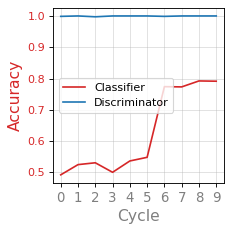

In [16]:
R.plot() # after 10 runs of GP2

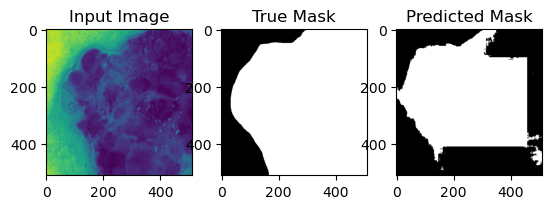

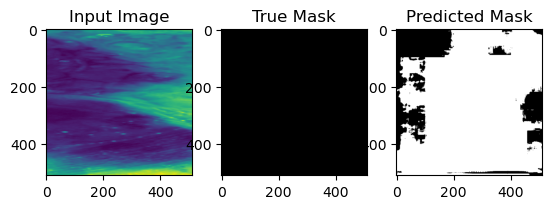

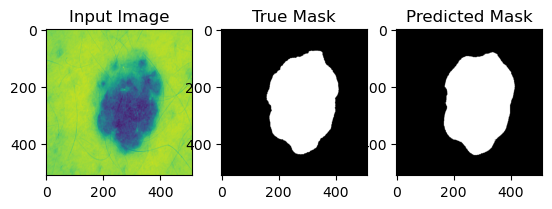

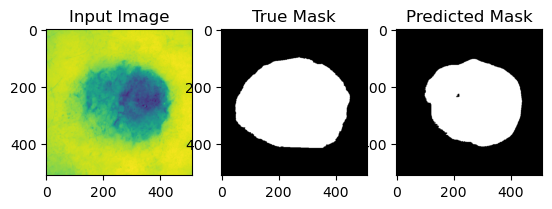

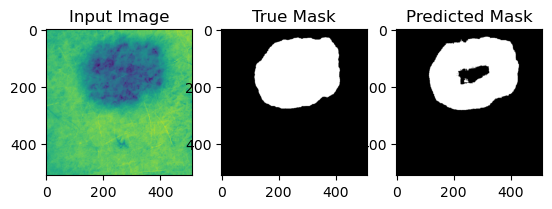

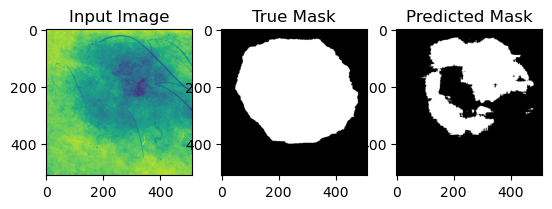

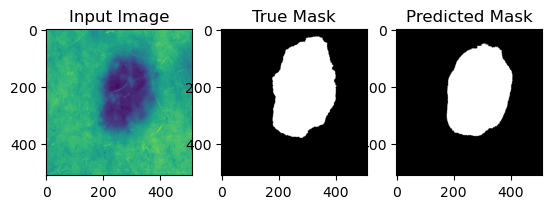

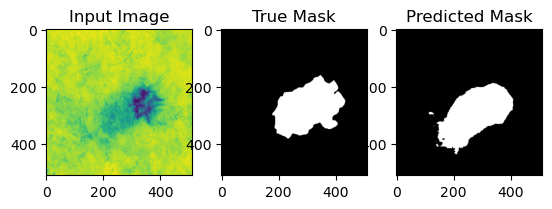

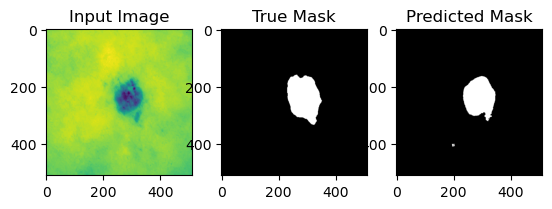

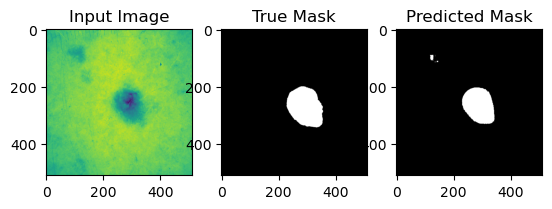

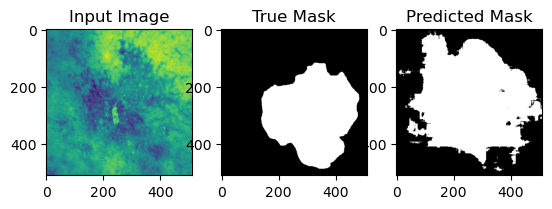

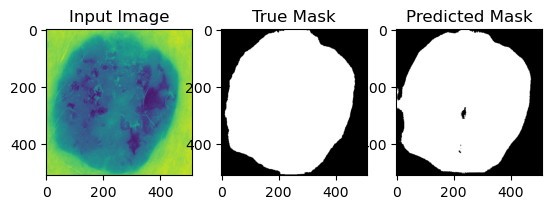

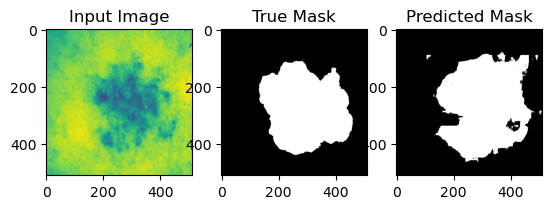

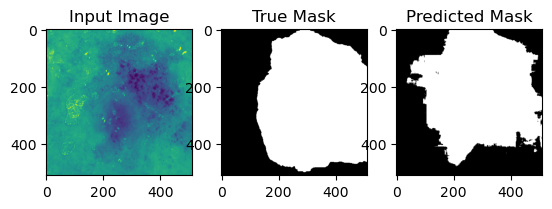

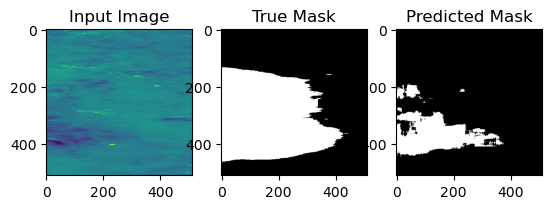

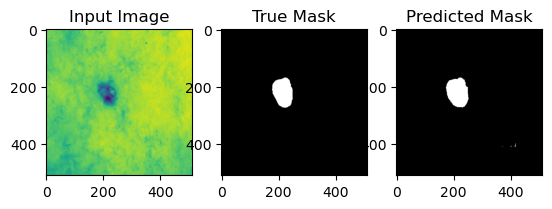

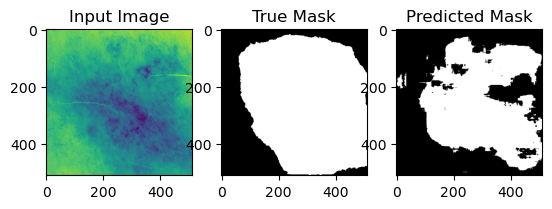

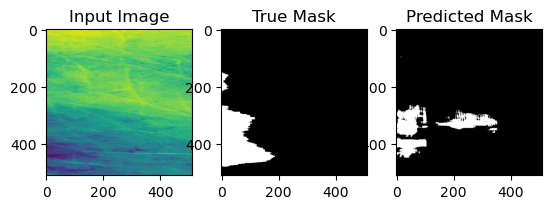

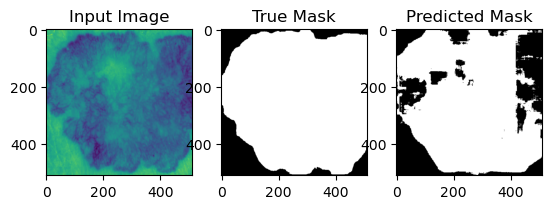

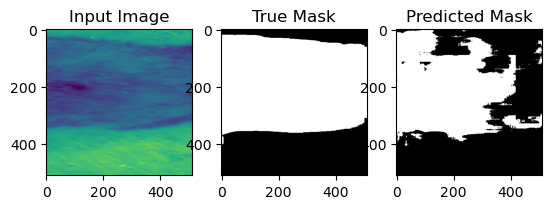

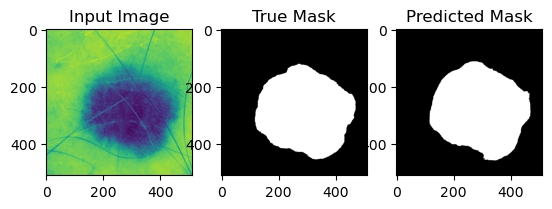

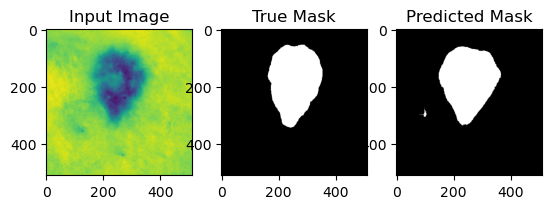

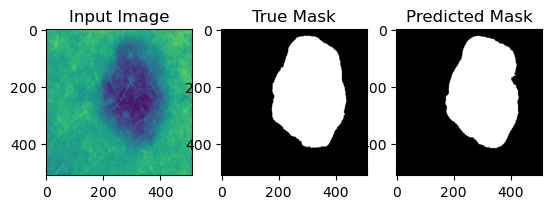

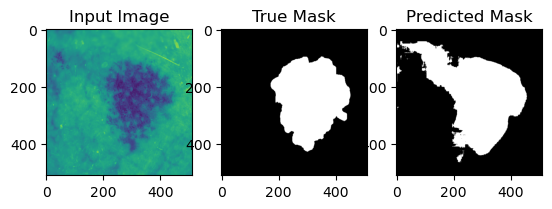

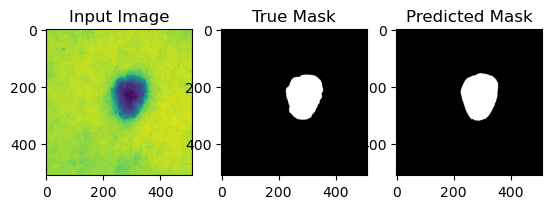

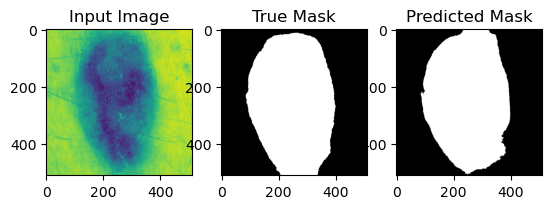

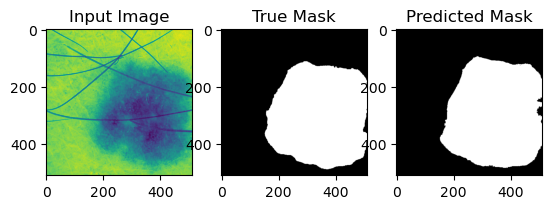

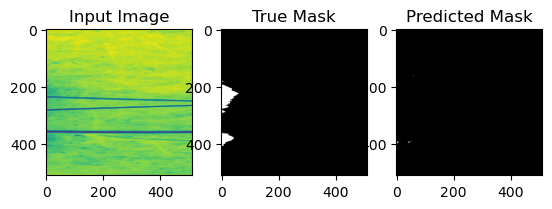

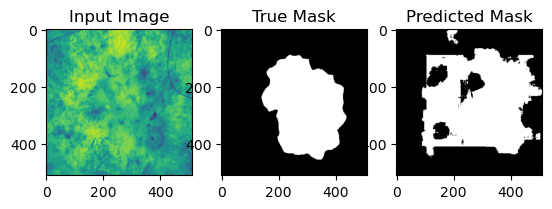

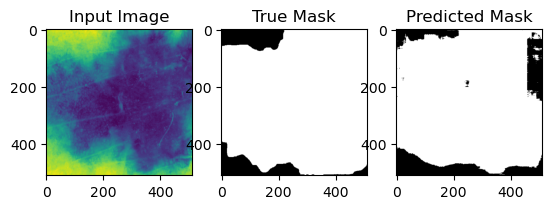

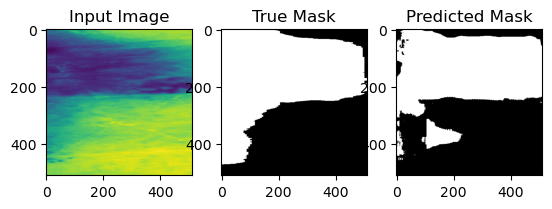

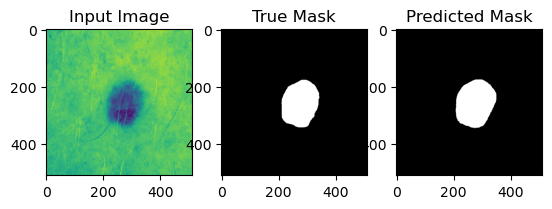

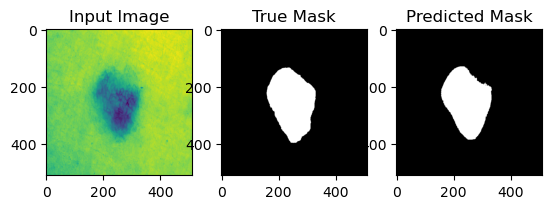

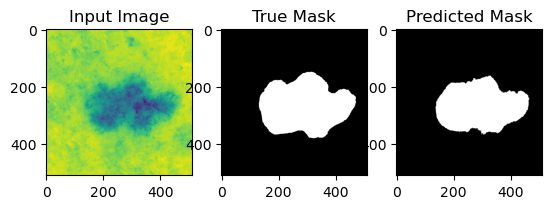

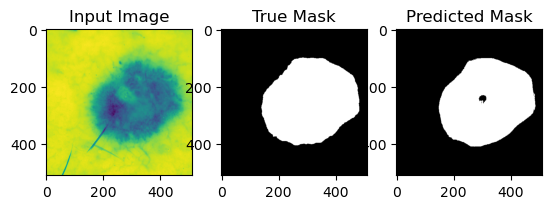

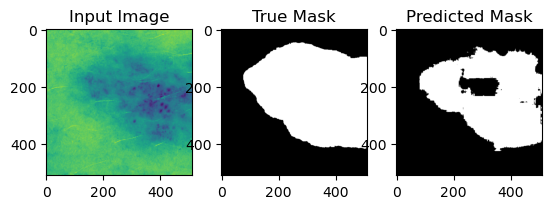

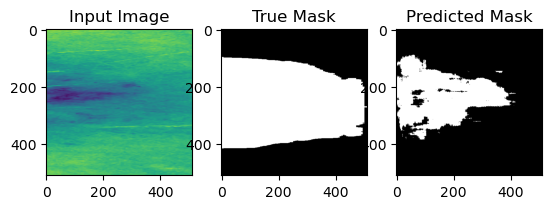

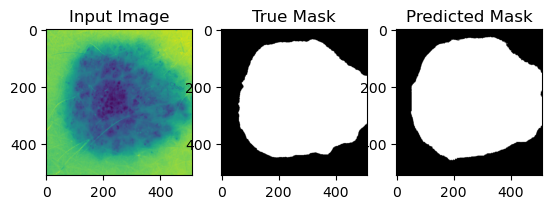

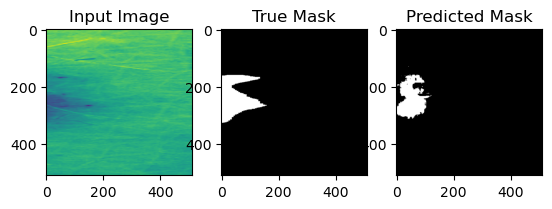

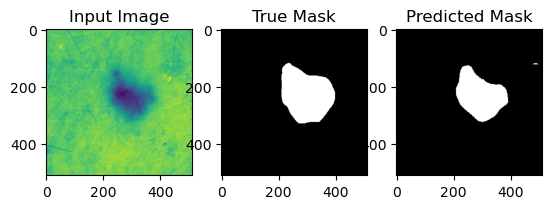

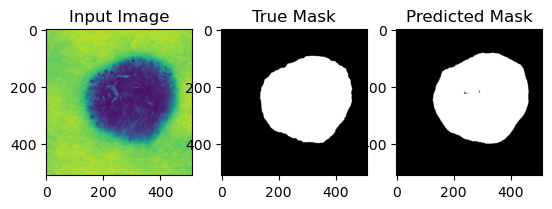

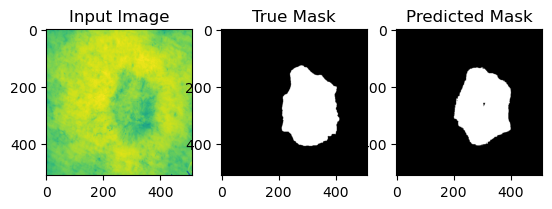

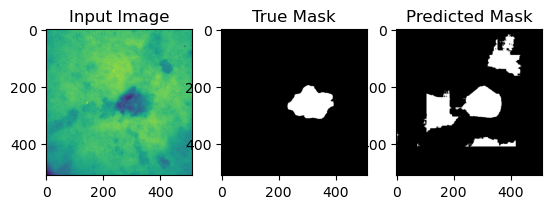

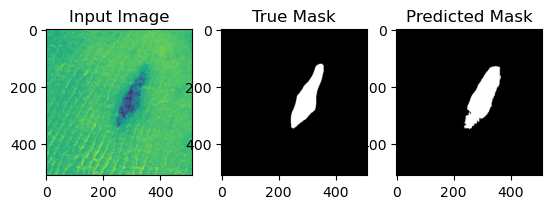

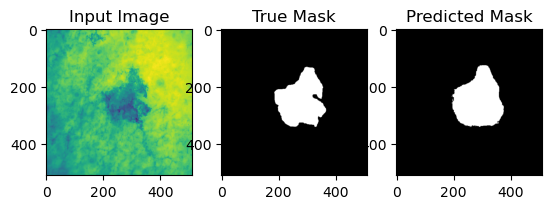

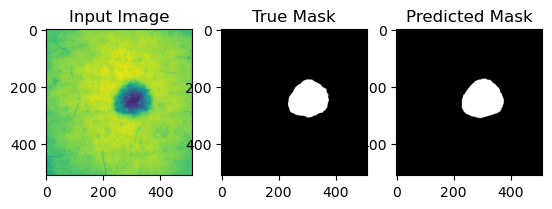

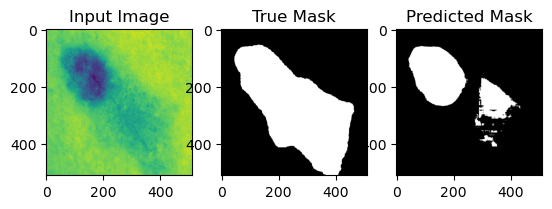

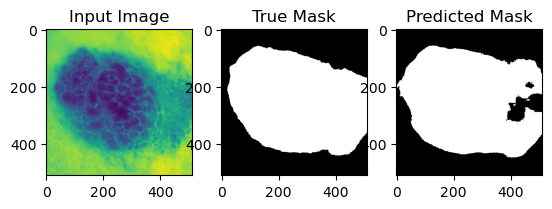

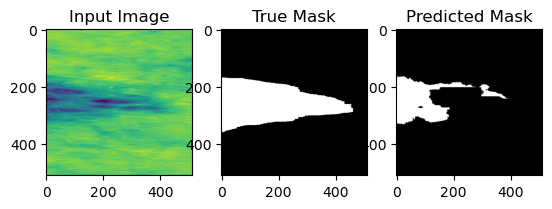

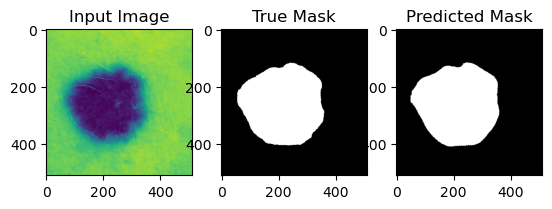

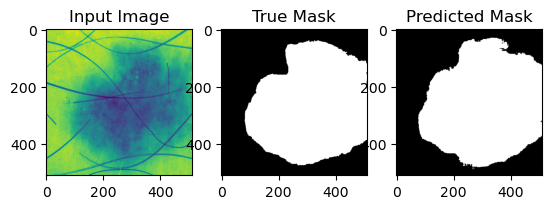

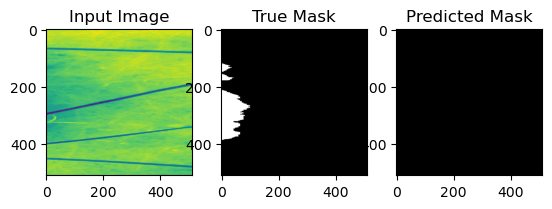

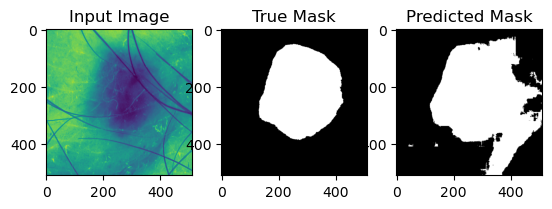

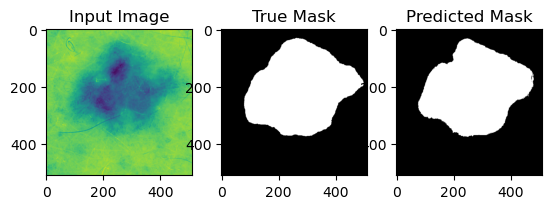

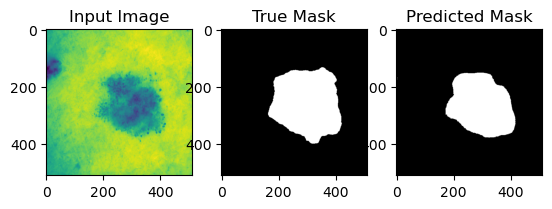

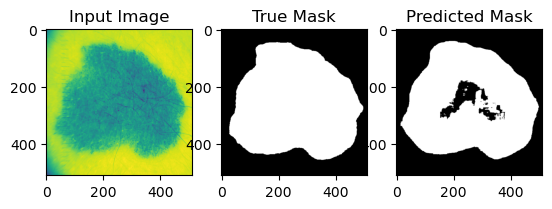

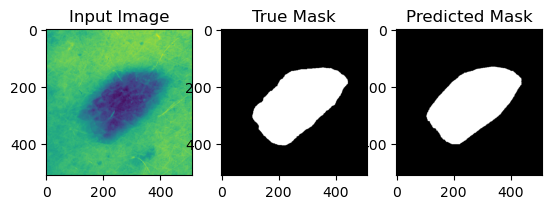

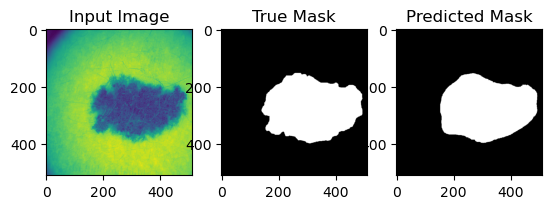

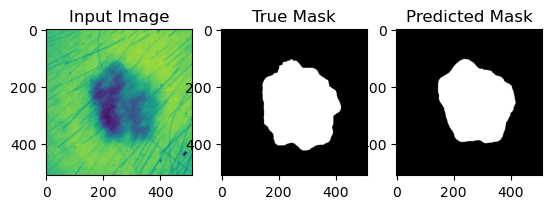

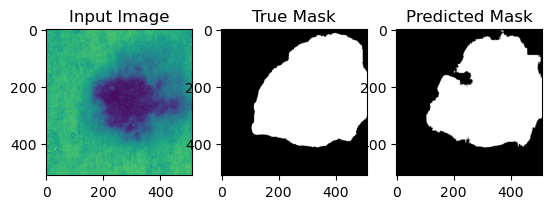

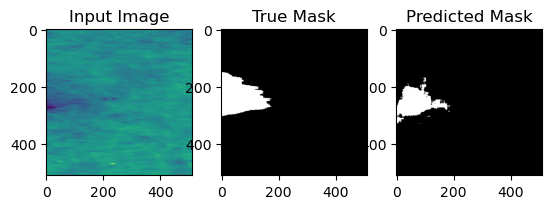

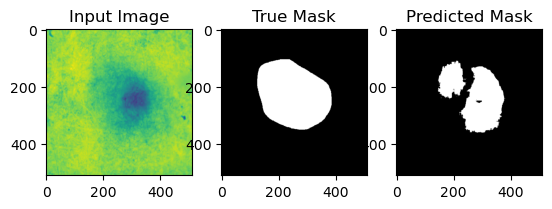

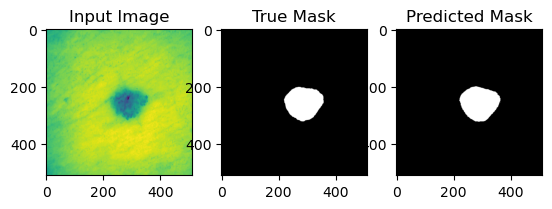

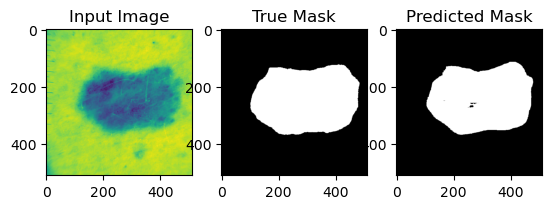

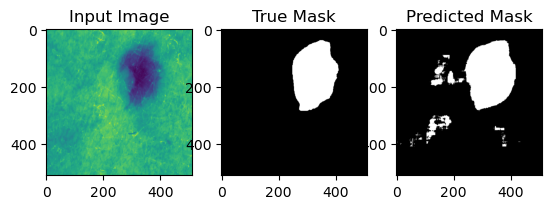

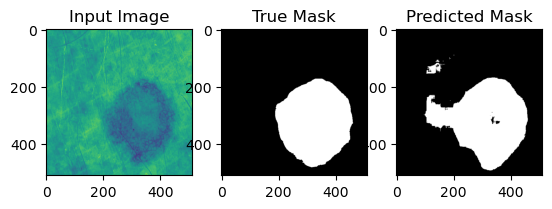

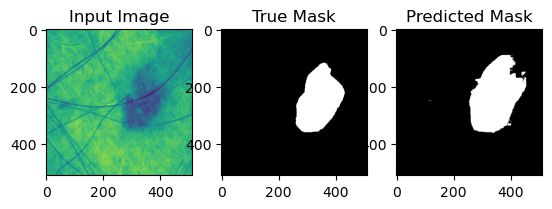

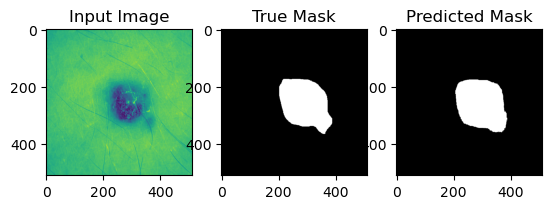

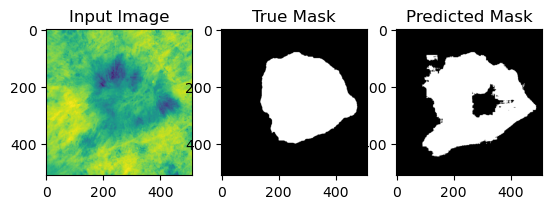

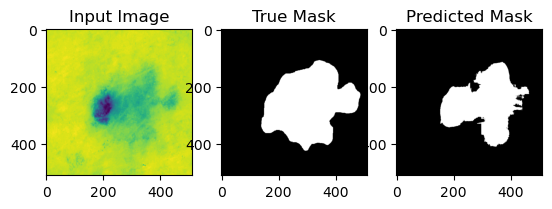

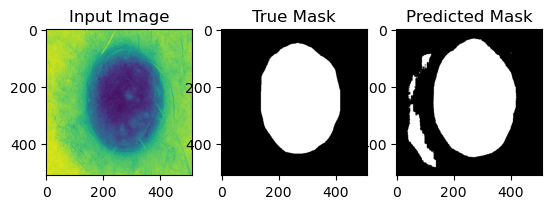

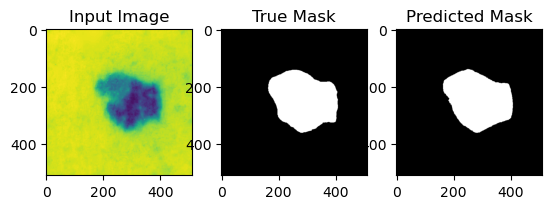

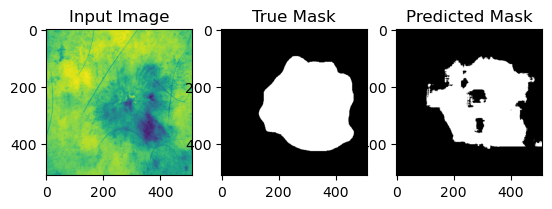

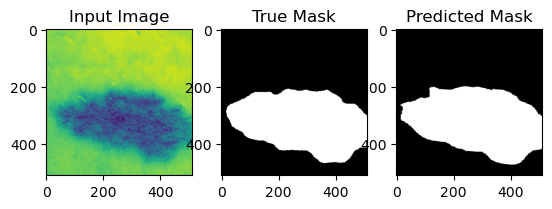

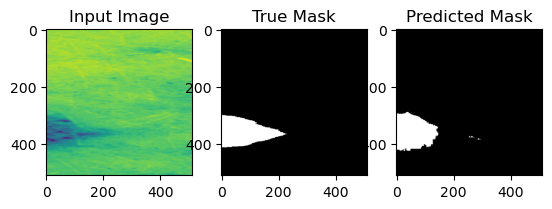

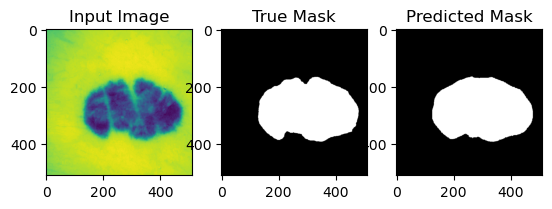

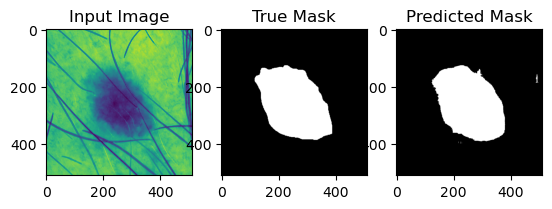

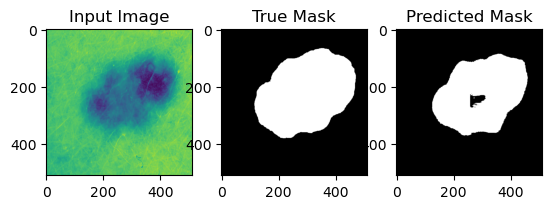

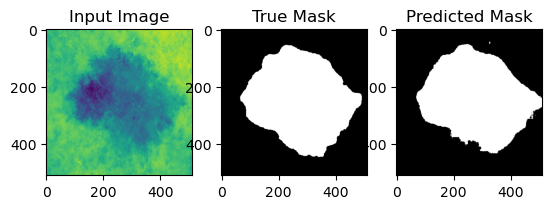

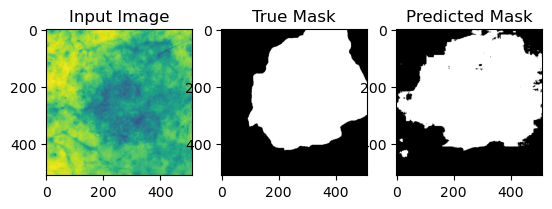

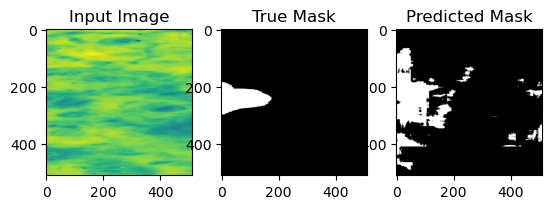

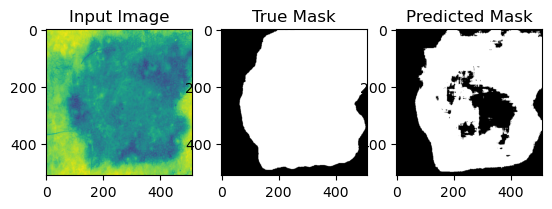

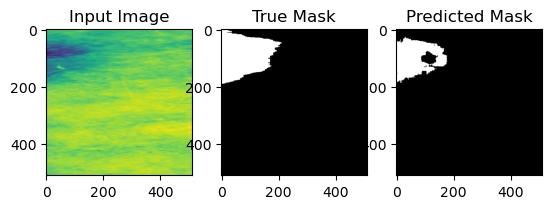

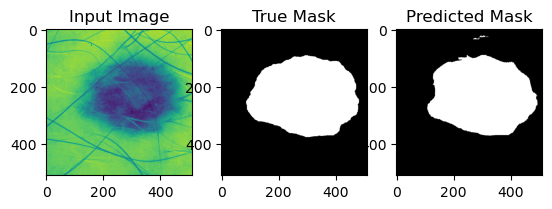

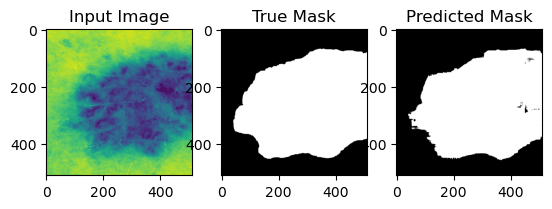

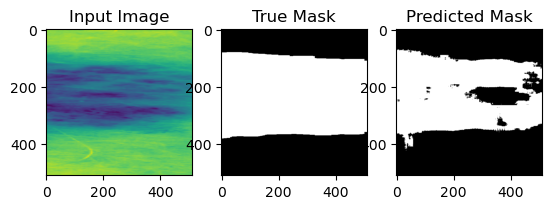

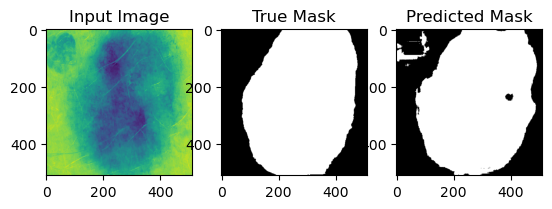

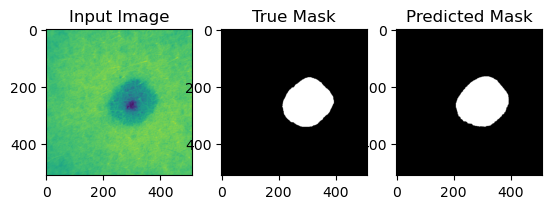

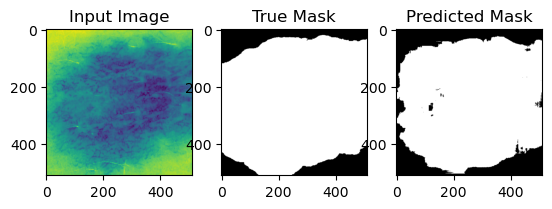

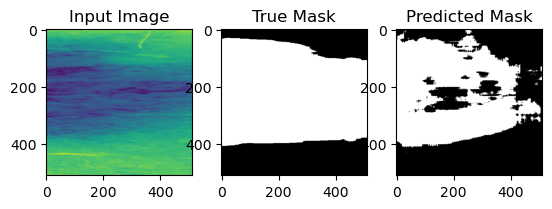

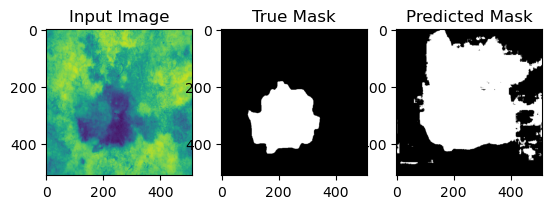

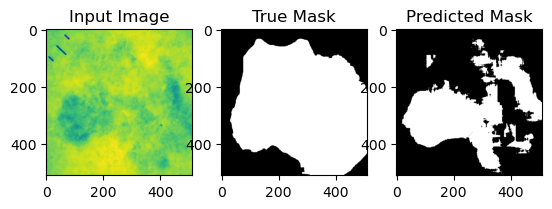

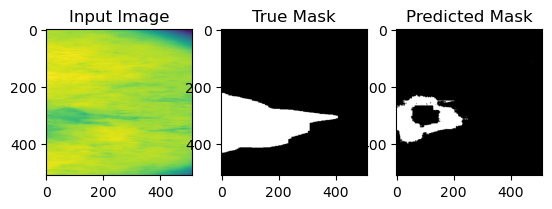

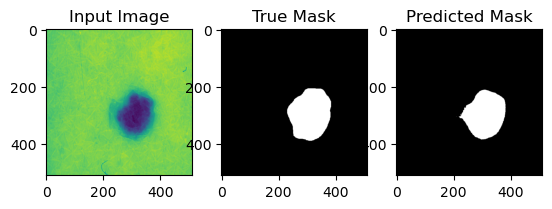

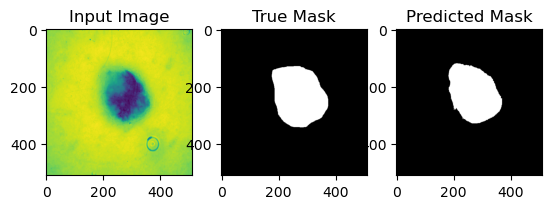

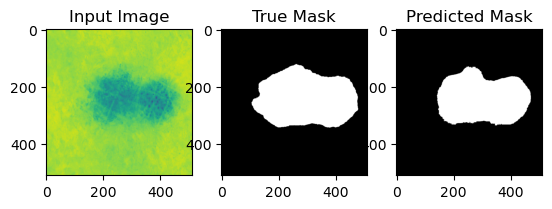

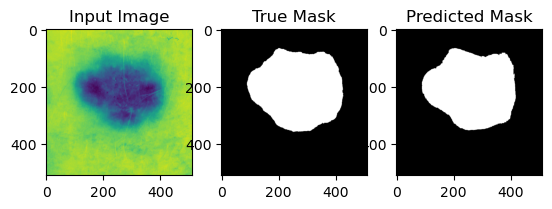

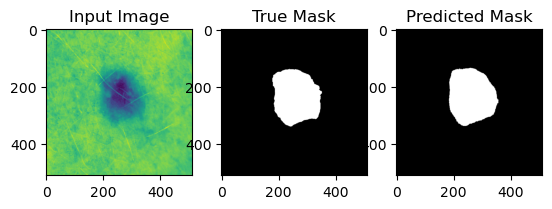

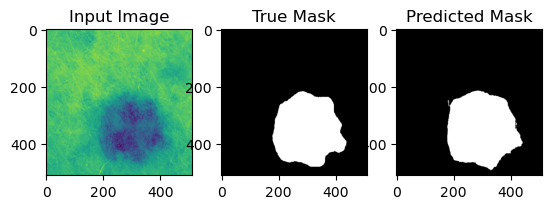

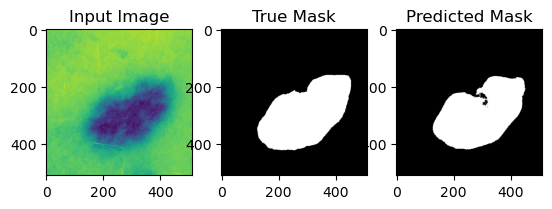

In [17]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=100) # after 10 runs of GP2